In [1]:
import skbeam.core.roi as roi 
import skbeam.core.correlation as corr
import skbeam.core.utils as utils

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

In [135]:
num_levels = 1
num_bufs = 10  # must be even
xdim = 10
ydim = 10
stack_size = 10
img_stack = np.random.randint(1, 3, (stack_size, xdim, ydim))
rois = np.zeros_like(img_stack[0])
# make sure that the ROIs can be any integers greater than 1. They do not
# have to start at 1 and be continuous
rois[0:xdim//10, 0:ydim//10] = 5
rois[xdim//10:xdim//5, ydim//10:ydim//5] = 3

In [136]:
full_gen_two = corr.lazy_two_time(rois, img_stack, stack_size, num_bufs,
                                 num_levels)
for gen_result_two in full_gen_two:
        pass

two_time, lag_steps2 = corr.two_time_corr(rois, img_stack, stack_size,
                                         num_bufs, num_levels)

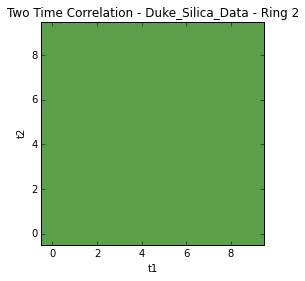

In [137]:
plt.imshow(two_time[:,:,0],vmin=0,  vmax='2', origin="lower", cmap="gist_earth")
plt.title("Two Time Correlation - Duke_Silica_Data - Ring 2")
plt.xlabel("t1")
plt.ylabel("t2")
plt.show()

In [138]:
np.diag(two_time[:,:,0])

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [139]:
def one_time_from_two_time(two_time_corr):
    """
    Parameters
    ----------
    two_time_corr : array
        matrix of two time correlation
        shape (number of images, number of images, number of labels(ROI))

    Returns
    -------
    one_time_corr : array
        matrix of one time correlation
        shape (number of images, number of labels(ROI))

    """
    one_time_corr = np.zeros((two_time_corr.shape[0], two_time_corr.shape[2]))
    for i in range(two_time_corr.shape[2]):
        for j in range(two_time_corr.shape[0]):
            one_time_corr[j, i] = np.trace(two_time_corr[:, :, i],
                                           offset=j)/two_time_corr.shape[0]
    return one_time_corr


In [140]:
two_time[:,:,0]

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [141]:
ty = one_time_from_two_time(two_time)

In [145]:
ty[:,0]

array([ 1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1])

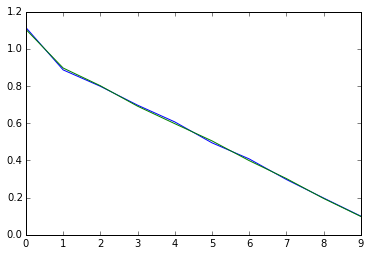

In [106]:
plt.plot(ty)

In [12]:
img = np.random.randint(1, 3, (1, xdim, ydim))
y = []
for i in range(10):
    y.append(img)
    

In [13]:
two_time1, lag_steps1 = corr.two_time_corr(rois, y, stack_size,
                                           num_bufs=10, num_levels=1)

In [14]:
np.all(two_time1[:,:,1])

True

In [15]:
y.append(img_stack[0] for i in range(10))

In [16]:
y

[array([[[1, 1, 2, ..., 1, 1, 1],
         [1, 2, 2, ..., 2, 1, 2],
         [2, 1, 1, ..., 1, 2, 2],
         ..., 
         [1, 2, 1, ..., 2, 2, 1],
         [2, 1, 1, ..., 2, 1, 1],
         [1, 1, 1, ..., 1, 2, 2]]]), array([[[1, 1, 2, ..., 1, 1, 1],
         [1, 2, 2, ..., 2, 1, 2],
         [2, 1, 1, ..., 1, 2, 2],
         ..., 
         [1, 2, 1, ..., 2, 2, 1],
         [2, 1, 1, ..., 2, 1, 1],
         [1, 1, 1, ..., 1, 2, 2]]]), array([[[1, 1, 2, ..., 1, 1, 1],
         [1, 2, 2, ..., 2, 1, 2],
         [2, 1, 1, ..., 1, 2, 2],
         ..., 
         [1, 2, 1, ..., 2, 2, 1],
         [2, 1, 1, ..., 2, 1, 1],
         [1, 1, 1, ..., 1, 2, 2]]]), array([[[1, 1, 2, ..., 1, 1, 1],
         [1, 2, 2, ..., 2, 1, 2],
         [2, 1, 1, ..., 1, 2, 2],
         ..., 
         [1, 2, 1, ..., 2, 2, 1],
         [2, 1, 1, ..., 2, 1, 1],
         [1, 1, 1, ..., 1, 2, 2]]]), array([[[1, 1, 2, ..., 1, 1, 1],
         [1, 2, 2, ..., 2, 1, 2],
         [2, 1, 1, ..., 1, 2, 2],
         ..., 

In [17]:
import numpy as np
from numpy.testing import assert_array_almost_equal

In [18]:
y = []
for i in range(10):
        y.append(img_stack[0])
y

[array([[2, 2, 2, ..., 2, 1, 1],
        [1, 1, 1, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 2],
        ..., 
        [1, 1, 1, ..., 1, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 2, ..., 1, 2, 2]]), array([[2, 2, 2, ..., 2, 1, 1],
        [1, 1, 1, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 2],
        ..., 
        [1, 1, 1, ..., 1, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 2, ..., 1, 2, 2]]), array([[2, 2, 2, ..., 2, 1, 1],
        [1, 1, 1, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 2],
        ..., 
        [1, 1, 1, ..., 1, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 2, ..., 1, 2, 2]]), array([[2, 2, 2, ..., 2, 1, 1],
        [1, 1, 1, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 2],
        ..., 
        [1, 1, 1, ..., 1, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 2, ..., 1, 2, 2]]), array([[2, 2, 2, ..., 2, 1, 1],
        [1, 1, 1, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 2],
        ..., 
        [1, 1, 1, ..., 1, 2, 2],
  

In [20]:
two_time, lag_steps = corr.two_time_corr(rois, np.asarray(y),
                                         10, num_bufs=10,
                                         num_levels=1)

#assert (np.all(two_time)==False)

In [21]:
u = np.zeros(1)
u

array([ 0.])

In [22]:
for i in range(5):
    u[0] += 1
    print int(u[0])

1
2
3
4
5


In [23]:
def setup():
    global num_levels, num_bufs, xdim, ydim, stack_size, img_stack, rois
    num_levels = 6
    num_bufs = 4  # must be even
    xdim = 256
    ydim = 512
    stack_size = 100
    img_stack = np.random.randint(1, 3, (stack_size, xdim, ydim))
    rois = np.zeros_like(img_stack[0])
    # make sure that the ROIs can be any integers greater than 1.
    # They do not have to start at 1 and be continuous
    rois[0:xdim//10, 0:ydim//10] = 5
    rois[xdim//10:xdim//5, ydim//10:ydim//5] = 3
    
def test_lazy_vs_original():
    setup()
    # run the correlation on the full stack
    full_gen_one = lazy_one_time(
        img_stack, num_levels, num_bufs, rois)
    for gen_result_one in full_gen_one:
        pass

    g2, lag_steps = multi_tau_auto_corr(num_levels, num_bufs,
                                        rois, img_stack)

    assert np.all(g2 == gen_result_one.g2)
    assert np.all(lag_steps == gen_result_one.lag_steps)

    full_gen_two = lazy_two_time(rois, img_stack[:50], 50,
                                 num_bufs=4, num_levels=2)
    for gen_result_two in full_gen_two:
        pass

    two_time, lag_steps2 = two_time_corr(rois, img_stack[:50], 50,
                                         num_bufs=4, num_levels=2)

    assert np.all(two_time == gen_result_two.g2)
    assert np.all(lag_steps2 == gen_result_two.lag_steps)


In [26]:
two_time, lag_steps2 = corr.two_time_corr(rois, img_stack[:50], 50,
                                         num_bufs=4, num_levels=2)



In [29]:
full_gen_two = corr.lazy_two_time(rois, img_stack[:50], 50,
                                 num_bufs=4, num_levels=2)
for gen_result_two in full_gen_two:
        pass

In [30]:
assert np.all(two_time == gen_result_two.g2)

In [31]:
assert np.all(lag_steps2 == gen_result_two.lag_steps)


In [33]:
 full_gen = corr.two_time_corr(rois, img_stack, stack_size
                             ,stack_size, 1)


In [34]:
full_gen = corr.lazy_two_time(rois, img_stack, stack_size
                             ,stack_size, 1)
for full_result in full_gen:
        pass


In [35]:
# run the correlation on the first half
gen_first_half = corr.lazy_two_time(rois, img_stack[:stack_size//2], stack_size,
                                   num_bufs=stack_size, num_levels=1)
for first_half_result in gen_first_half:
        pass

In [37]:
# run the correlation on the second half by passing in the state from the
    # first half
gen_second_half = corr.lazy_two_time(rois, img_stack[stack_size//2:], stack_size,
                                   num_bufs=stack_size, num_levels=1,
                                   two_time_internal_state=first_half_result.internal_state)


In [38]:
for second_half_result in gen_second_half:
        pass


In [39]:
 assert np.all(full_result.g2 ==
                  second_half_result.g2)


In [40]:
bad_list = [1, 5, 6,7]

In [45]:
img_num=6
if 10 in bad_list:
    print ("yes")

In [48]:
np.nan*np.ones((2,2))

array([[ nan,  nan],
       [ nan,  nan]])

In [49]:
y1 = np.ones((2, 2)) + np.nan*np.ones((2,2))

In [50]:
y1


array([[ nan,  nan],
       [ nan,  nan]])

In [51]:
y2 = np.ones((2,2))

In [52]:
y1*y2

array([[ nan,  nan],
       [ nan,  nan]])

In [53]:
y0=np.ones((2, 2))

In [54]:
y0


array([[ 1.,  1.],
       [ 1.,  1.]])

In [55]:
y0 +y1

array([[ nan,  nan],
       [ nan,  nan]])

In [56]:
y0*y1

array([[ nan,  nan],
       [ nan,  nan]])

In [96]:
~np.isnan((y1,y2, y0))

array([[[False, False],
        [False, False]],

       [[ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True]]], dtype=bool)

In [98]:
y = ((y0, y1, y2))

In [100]:
yu = np.delete(list, np.isnan(y))

/Users/sameera/mc/envs/work/lib/python2.7/site-packages/numpy/lib/function_base.py:3830: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  "as boolean index instead of casting it to integer", FutureWarning)


In [104]:
yu = list(y).pop(np.isnan(y))

TypeError: only length-1 arrays can be converted to Python scalars

In [63]:
y0, y1, y2

(array([[ 1.,  1.],
        [ 1.,  1.]]), array([[ nan,  nan],
        [ nan,  nan]]), array([[ 1.,  1.],
        [ 1.,  1.]]))